In [499]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [507]:
class P1():
    def __init__(self, m, n, winds, eps, max_iter):
        self.Q_table = np.zeros((m*n, 4)) # 4 directions - N, E, S, W or up, right, down, left
        self.nu_table = np.zeros((m*n, 4))
        self.u_table = np.zeros((m*n,))
        self.m = m
        self.n = n
        self.eps = eps
        self.max_iter = max_iter
        self.winds = winds
                    
    def solve(self):
        converged = False
        iter = 0
        Q_total = []
        while(converged == False and iter<self.max_iter):
            
            # iterating over all states
            for i in range(1, 1 + self.m*self.n):
                u = self.get_greedy_u(i, eps)
                self.nu_table[i-1, u] +=1
                self.Q_table[i-1, u] = self.Q_table[i-1, u] + self.a(self.nu_table[i-1, u])*(self.g(i, u) + self.max_u_Q(self.next_state(i, u))[1] - self.Q_table[i-1, u])
                
            iter+=1
            Q_total.append(self.Q_table.sum())
        
        return Q_total
    
    def get_greedy_u(self, s, eps):
        p = random.uniform(0, 1)
        u_opti, Qbest = self.max_u_Q(s)

        if(p>eps): #exploit
            return u_opti
        
        else: #explore
            u = self.get_random_valid_u(s, u_opti)
            return u
    
    def get_random_valid_u(self, s, u_opti):
        while(True):
            u_dash = random.randint(0, 3)
            return u_dash
        
    
    def g(self, i, u):
        r, c = self.get_r_c(self.next_state(i, u))
        if((r, c) != (3,9)):
            return -1
        else:
            return 0
            
    def a(self, n):   
        return (1/n)**0.6
#         return 0.1
    
    def get_r_c(self, s):
        # to get row and col number from s. Indexes r and c are 0 based
        r = (s-1)//self.n
        c = (s-1)%self.n
        return r, c
    
    def get_s(self, r, c):
        # to get s from row and col number
        return (r*12 +c+1)
    
    
    def next_state(self, s, u):
        r, c = self.get_r_c(s)
        if(u == 0):
            return self.get_s(max(r-1-self.winds[c], 0), c)
        elif(u == 1):
            return self.get_s(max(r-self.winds[c], 0), min(c+1, 11))
        elif(u == 2):
#             print(self.winds)
#             print(r)
            return self.get_s(min(max(r+1-self.winds[c], 0), 6), c)
        elif(u == 3):
            return self.get_s(max(r-self.winds[c], 0), max(c-1, 0))
        
            
    
    def max_u_Q(self, i):
        r, c = self.get_r_c(i)
        ubest = -1
        Qbest = -np.inf
        for u in range(4):
            if(self.Q_table[i-1, u]>=Qbest):
                Qbest = self.Q_table[i-1, u]
                ubest = u
                
        return ubest, self.Q_table[i-1, ubest]
    
    def getQ(self):
        return self.Q_table
    
    def getU(self):
        
        policy = np.zeros((self.m, self.n))
        for r in range(self.m):
            for c in range(self.n):
                policy[r, c] = np.argmax(self.Q_table[self.get_s(r, c)-1])
        return policy
    
    def getnu(self):
        return self.nu_table

In [534]:
#m*n grid, m = rows, n = cols
m, n = 7, 12
winds = np.array([0, 0, 0, 1, 1, 1, 1, 2, 2, 1, 1, 0])
eps = 0.2
max_iter = 1000
env1 = P1(m, n, winds, eps, max_iter)
Q_total = env1.solve()

In [535]:
print('Q values')
env1.getQ()

Q values


array([[-16.70797324, -15.99999001, -16.54345641, -16.65988055],
       [-15.66434296, -14.9999976 , -15.73030934, -16.55206714],
       [-14.82703675, -13.99999931, -14.80931357, -15.45711478],
       [-13.85051884, -12.99999981, -13.87406972, -14.76072083],
       [-12.91011552, -11.99999995, -12.92772366, -13.89434485],
       [-11.89235208, -10.99999998, -11.93995752, -12.86082068],
       [-10.97562295, -10.        , -10.97714299, -11.91105529],
       [ -9.98467701,  -9.        ,  -9.97221656, -10.94094398],
       [ -8.97191589,  -8.        ,  -8.99102224,  -9.94574159],
       [ -7.989501  ,  -7.        ,  -7.98912854,  -8.96425276],
       [ -6.99713475,  -6.        ,  -6.99566068,  -7.98749196],
       [ -5.99478375,  -5.99818461,  -5.        ,  -6.99770074],
       [-16.55997208, -15.99998945, -16.62849677, -16.67365126],
       [-15.816533  , -14.9999974 , -15.81840905, -16.28653542],
       [-14.8671138 , -13.99999931, -14.83483237, -15.60058748],
       [-13.78622181, -12

In [536]:
print('Policy Optimal. N, E, S, W = 0, 1, 2, 3')
env1.getU()

Policy Optimal. N, E, S, W = 0, 1, 2, 3


array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 2.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 2., 3., 0., 3.]])

Graph depicting sum of values of Q table with increase in iterations


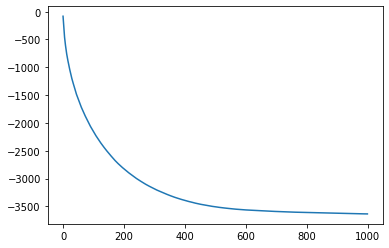

In [537]:
print('Graph depicting sum of values of Q table with increase in iterations')
plt.plot(Q_total)

### Running for different epsilons

Policy for epsilon = 0.1 
 [[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 2.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 3. 3.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 2. 3. 0. 3.]]


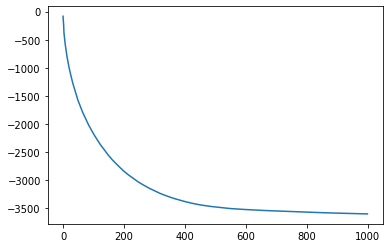

Policy for epsilon = 0.3 
 [[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 2.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 3. 3.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 2. 3. 0. 3.]]


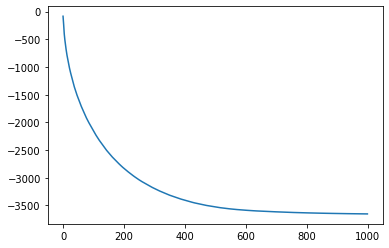

Policy for epsilon = 0.5 
 [[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 2.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 3. 3.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 2. 3. 0. 3.]]


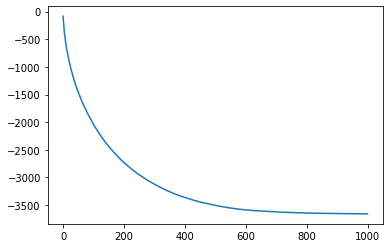

Policy for epsilon = 0.8 
 [[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 2.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 3. 3.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 2. 3. 0. 3.]]


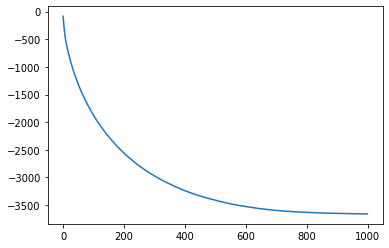

Policy for epsilon = 0.95 
 [[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 2.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 3. 3.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 2. 3. 0. 3.]]


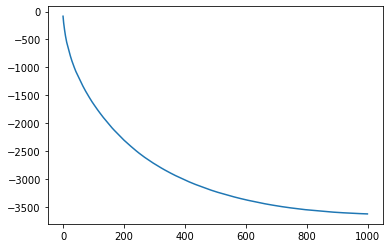

In [539]:
m, n = 7, 12
winds = np.array([0, 0, 0, 1, 1, 1, 1, 2, 2, 1, 1, 0])
max_iter = 1000

for eps in [0.1, 0.3, 0.5, 0.8, 0.95]:
    env1 = P1(m, n, winds, eps, max_iter)
    Q_total = env1.solve()
    print('Policy for epsilon = {} \n {}'.format(eps, env1.getU()))
    plt.plot(Q_total)
    plt.show()